In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sg
from scipy.fft import fft, fftfreq


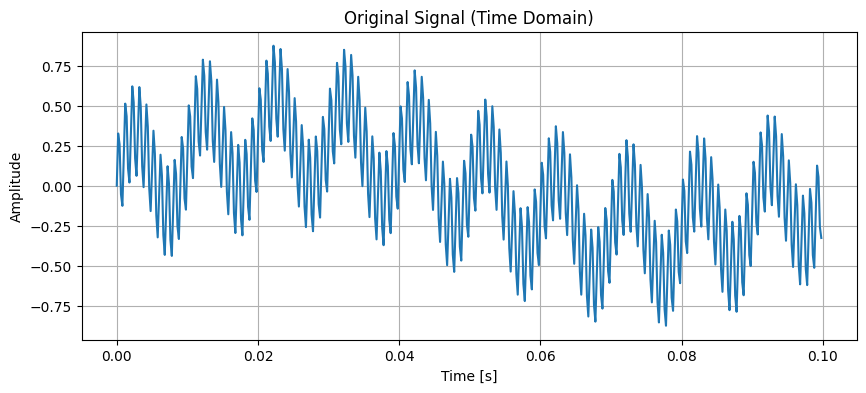

In [2]:
# Sampling parameters
fs = 5000  # Sampling frequency (Hz)
T = 1  # Duration (s)
N = fs * T  # Total samples
t = np.linspace(0, T, N, endpoint=False)

# Generate sum of sinusoids with equal amplitudes (0.3)
f1, f2, f3 = 10, 100, 1000  # Frequencies
a = 0.3  # Amplitude
signal = a * (np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t))

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(t[:500], signal[:500], color='C0')
plt.title("Original Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


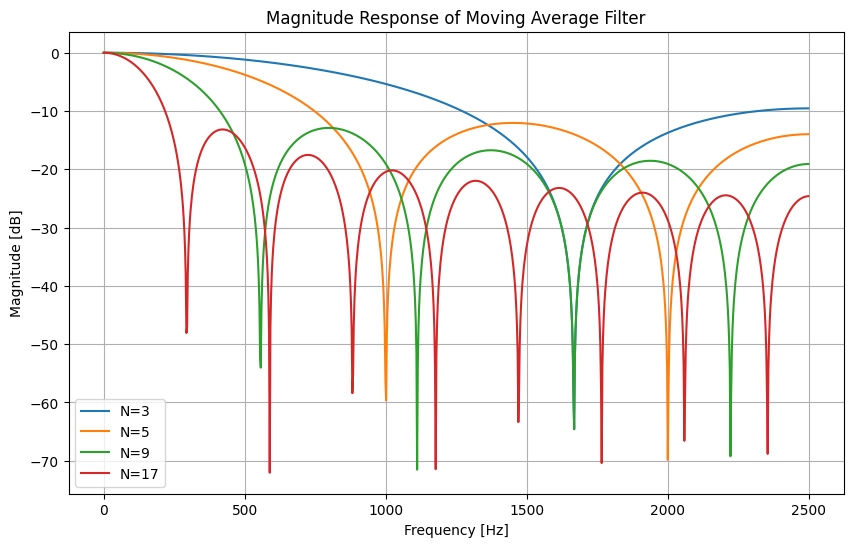

In [3]:
def moving_average_filter(N):
    """Creates moving average filter coefficients."""
    b = np.ones(N) / N  # Numerator coefficients
    a = np.array([1])  # Denominator coefficient (FIR)
    return b, a

# Plot frequency response for N = 3, 5, 9, 17
plt.figure(figsize=(10, 6))

for N in [3, 5, 9, 17]:
    b, a = moving_average_filter(N)
    w, Hw = sg.freqz(b, a, worN=1024, fs=fs)
    
    plt.plot(w, 20 * np.log10(np.abs(Hw)), label=f"N={N}")

plt.title("Magnitude Response of Moving Average Filter")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.legend()
plt.grid()
plt.show()


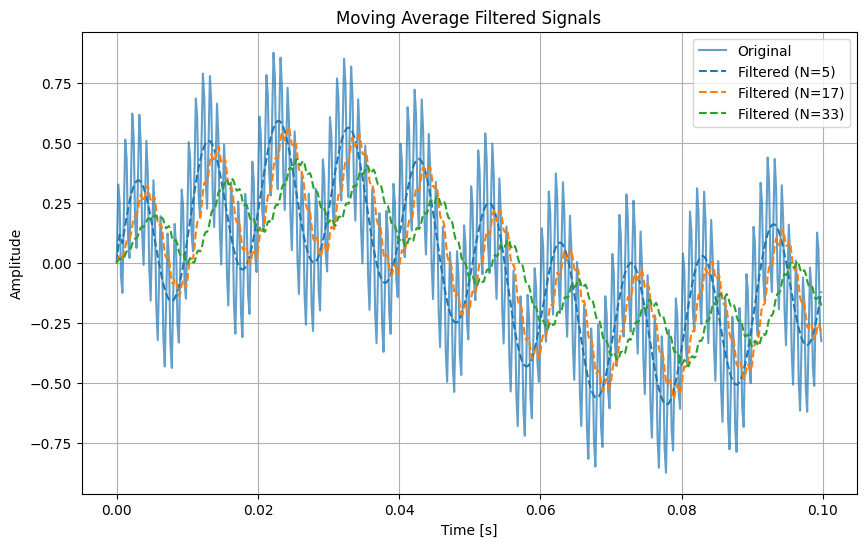

In [4]:
# Apply moving average filter for different N values
filtered_signals = {}

for N in [5, 17, 33]:
    b, a = moving_average_filter(N)
    filtered_signals[N] = sg.lfilter(b, a, signal)

# Plot original vs filtered signals
plt.figure(figsize=(10, 6))

plt.plot(t[:500], signal[:500], label="Original", color='C0', alpha=0.7)
for N in [5, 17, 33]:
    plt.plot(t[:500], filtered_signals[N][:500], linestyle="dashed", label=f"Filtered (N={N})")

plt.title("Moving Average Filtered Signals")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


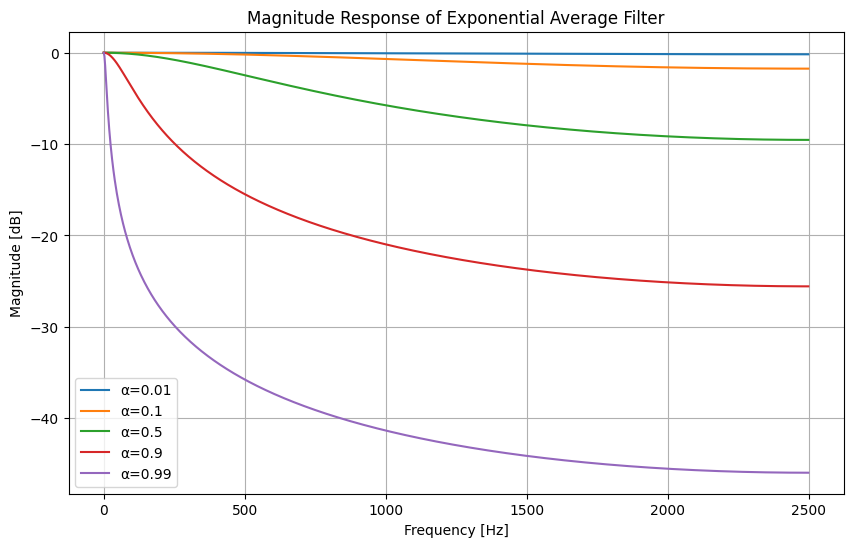

In [5]:
def exponential_moving_average(alpha):
    """Creates exponential moving average filter coefficients."""
    b = np.array([1 - alpha])  # Numerator coefficient
    a = np.array([1, -alpha])  # Denominator coefficients (IIR)
    return b, a

# Plot frequency response for α = 0.01, 0.1, 0.5, 0.9, 0.99
plt.figure(figsize=(10, 6))

for alpha in [0.01, 0.1, 0.5, 0.9, 0.99]:
    b, a = exponential_moving_average(alpha)
    w, Hw = sg.freqz(b, a, worN=1024, fs=fs)
    
    plt.plot(w, 20 * np.log10(np.abs(Hw)), label=f"α={alpha}")

plt.title("Magnitude Response of Exponential Average Filter")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.legend()
plt.grid()
plt.show()


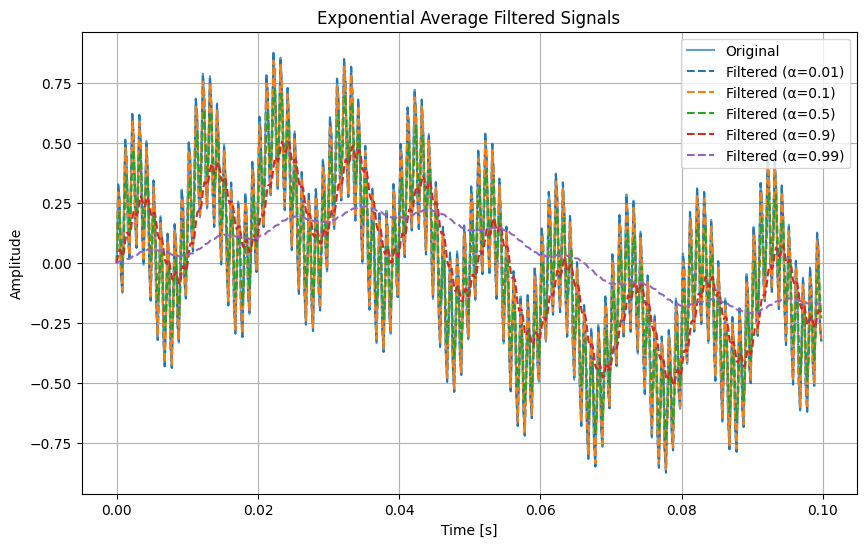

In [6]:
# Apply exponential moving average filter for different α values
filtered_exp_signals = {}

for alpha in [0.01, 0.1, 0.5, 0.9, 0.99]:
    b, a = exponential_moving_average(alpha)
    filtered_exp_signals[alpha] = sg.lfilter(b, a, signal)

# Plot original vs filtered signals
plt.figure(figsize=(10, 6))

plt.plot(t[:500], signal[:500], label="Original", color='C0', alpha=0.7)
for alpha in [0.01, 0.1, 0.5, 0.9, 0.99]:
    plt.plot(t[:500], filtered_exp_signals[alpha][:500], linestyle="dashed", label=f"Filtered (α={alpha})")

plt.title("Exponential Average Filtered Signals")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()
